trying exercise from https://cs231n.github.io/neural-networks-case-study/

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

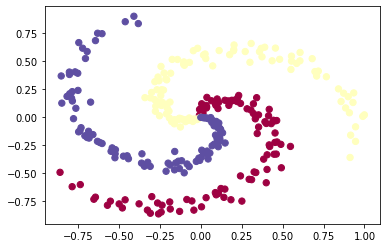

In [8]:
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [26]:
W = np.random.randn(D, K)
b = np.random.randn(K)

def forward(x):
    return np.dot(x, W) + b

In [47]:
scores = forward(X)
scores_exp = np.exp(scores)
probs = scores_exp / np.sum(scores_exp, axis=1, keepdims=True)

In [55]:
y_one_hot = np.zeros((y.shape[0], K))
y_one_hot[np.arange(y.size), y] = 1

In [87]:
data_loss = np.mean(-np.log2(probs[range(len(probs)), y]))
L2_loss_lambda = 0.5
L2_loss = L2_loss_lambda * np.sum(W**2)
loss = data_loss + L2_loss

In [88]:
loss

9.376635793427361

In [90]:
H = np.array([
    [1, 1, 1, 0, 1, 0, 0],
    [0, 1, 1, 1, 0, 1, 0],
    [1, 0, 1, 1, 0, 0, 1]
])

In [93]:
n = np.array([1, 1, 0, 1, 0, 0, 0])

In [95]:
np.dot(H, n) % 2

array([0, 0, 0])

In [115]:
results = {}
for i in range(128):
    n = list(map(int, list(bin(i)[2:])))
    n = np.array([0] * (7 - len(n)) + n)
    x = np.dot(H, n) % 2
    if n.sum() > 0 and x.sum() == 0:
        results.setdefault(n.sum(), [])
        results[n.sum()].append(n)

In [123]:
n = np.array([0, 0, 1, 0, 1, 1, 1])
z = np.dot(H, n) % 2
z

array([0, 0, 0])